In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import pandas as pd

In [10]:
!dir stats


 Datentr�ger in Laufwerk C: ist Windows
 Volumeseriennummer: 1A37-1112

 Verzeichnis von c:\Users\WKL-Oschmann\Documents\Studium\Master\4. Semester\Reinforcement Learning\project\td3\stats

08.08.2023  12:30    <DIR>          .
08.08.2023  12:30    <DIR>          ..
05.08.2023  16:28            68.274 128.png
05.08.2023  16:26            54.130 256.png
07.08.2023  12:55           225.879 figure.png
07.08.2023  20:18         9.638.906 td3_checkpoint_hockey_3x512_tau=0.0025_0.9-1.1_defense__weak=False_e=25000_r=3.996.pkl
07.08.2023  20:14         9.332.185 td3_checkpoint_hockey_3x512_tau=0.0025_normalR_defense__weak=False_e=25000_r=5.5927.pkl
07.08.2023  20:15         9.385.158 td3_checkpoint_hockey_3x512_tau=0.005_every2e_0.9-1.1_defense__weak=False_e=25000_r=4.7332.pkl
07.08.2023  21:51         9.433.007 td3_checkpoint_hockey_3x512_tau=0.005_every2e_normalR_defense__weak=False_e=25000_r=5.3623.pkl
04.08.2023  08:49         9.705.374 td3_checkpoint_hockey_defense_2x128_weak=False_e=2500

In [49]:
with open('stats/td3_checkpoint_hockey_defense_2x128_weak=False_e=25000_r=3.2443.pkl', 'rb') as f:
    stats_dict_128 = pickle.load(f)

with open('stats/td3_checkpoint_hockey_2x256_defense_weak=False_e=25000_r=4.2314.pkl', 'rb') as f:
    stats_dict_256 = pickle.load(f)

with open('stats/td3_checkpoint_hockey_defense_3x512_weak=False_e=25000_r=4.7017.pkl', 'rb') as f:
    stats_dict_512 = pickle.load(f)

In [50]:
# complete training
with open('stats/td3_checkpoint_hockey_shooting&normal_2x128_weak=False_e=25000_r=7.5241.pkl', 'rb') as f:
    stats_dict_128_strong = pickle.load(f)

with open('stats/td3_checkpoint_hockey_shooting&normal_2x128_weak=True_e=25000_r=9.2198.pkl', 'rb') as f:
    stats_dict_128_weak = pickle.load(f)

with open('stats/td3_checkpoint_hockey_shooting&normal_2x256_weak=False_e=25000_r=8.0355.pkl', 'rb') as f:
    stats_dict_256_strong = pickle.load(f)

with open('stats/td3_checkpoint_hockey_shooting&normal_2x256_weak=True_e=25000_r=8.9789.pkl', 'rb') as f:
    stats_dict_256_weak = pickle.load(f)


In [51]:
# winners = np.asarray(stats_dict['winners'])
# losses = np.asarray(stats_dict['losses'])
# stats = np.asarray(stats_dict['stats'])


In [52]:
winners_128 = np.asarray(stats_dict_128['winners'])
winners_256 = np.asarray(stats_dict_256['winners'])
winners_512 = np.asarray(stats_dict_512['winners'])

winners_128_strong = np.asarray(stats_dict_128['winners'])
winners_256_strong = np.asarray(stats_dict_256['winners'])
winners_128_weak = np.asarray(stats_dict_128['winners'])
winners_256_weak = np.asarray(stats_dict_256['winners'])

In [53]:
def compute_win_ratio(winners):
    win_ratio = winners[:, 0] / (winners[:, 0] + winners[:, 1] + winners[:, 2])
    return win_ratio

win_ratio_128 = compute_win_ratio(winners_128)
win_ratio_256 = compute_win_ratio(winners_256)
win_ratio_512 = compute_win_ratio(winners_512)

win_ratio_128_strong = compute_win_ratio(winners_128_strong)
win_ratio_256_strong = compute_win_ratio(winners_256_strong)
win_ratio_128_weak = compute_win_ratio(winners_128_weak)
win_ratio_256_weak = compute_win_ratio(winners_256_weak)


In [54]:
# only defense
winner_df = pd.DataFrame({'2x128': win_ratio_128, '2x256': win_ratio_256, '3x512': win_ratio_512})
winner_df = winner_df.reset_index()
winner_df = winner_df.rename(columns={'index': 'episodes'})
winner_df['episodes'] = winner_df['episodes'] * 500
winner_df

,episodes,2x128,2x256,3x512
0,0,0.298,0.330,0.340
1,500,0.406,0.422,0.348
2,1000,0.370,0.416,0.394
3,1500,0.422,0.510,0.468
4,2000,0.532,0.480,0.466
5,2500,0.480,0.498,0.580
6,3000,0.516,0.490,0.624
7,3500,0.522,0.600,0.606
8,4000,0.624,0.546,0.684
9,4500,0.570,0.474,0.672


In [55]:
winner_df = winner_df.melt(id_vars=['episodes'], var_name='hidden_sizes', value_name='win_ratio')
winner_df

,episodes,hidden_sizes,win_ratio
0,0,2x128,0.298
1,500,2x128,0.406
2,1000,2x128,0.370
3,1500,2x128,0.422
4,2000,2x128,0.532
...,...,...,...
145,22500,3x512,0.910
146,23000,3x512,0.918
147,23500,3x512,0.922
148,24000,3x512,0.888


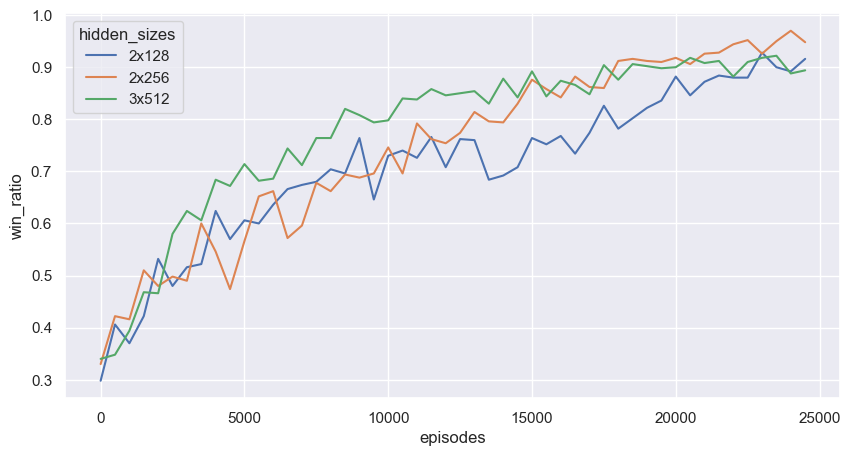

In [56]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})
 
ax = sns.lineplot(x='episodes', y='win_ratio', hue='hidden_sizes', data=winner_df)
fig = ax.get_figure()
fig.savefig('layer_sizes_plot')

In [19]:
# complete training
winner_complete = pd.DataFrame({'128 weak': win_ratio_128_weak, '128 strong': win_ratio_128_strong, '256 weak': win_ratio_256_weak, '256 strong': win_ratio_256_strong})
winner_complete = winner_complete.reset_index()
winner_complete = winner_complete.rename(columns={'index': 'episodes'})
winner_complete['episodes'] = winner_complete['episodes'] * 500
winner_complete

,episodes,128 weak,128 strong,256 weak,256 strong
0,0,0.298,0.298,0.238,0.238
1,500,0.406,0.406,0.306,0.306
2,1000,0.370,0.370,0.326,0.326
3,1500,0.422,0.422,0.378,0.378
4,2000,0.532,0.532,0.372,0.372
5,2500,0.480,0.480,0.448,0.448
6,3000,0.516,0.516,0.490,0.490
7,3500,0.522,0.522,0.476,0.476
8,4000,0.624,0.624,0.520,0.520
9,4500,0.570,0.570,0.482,0.482


In [20]:
winner_complete = winner_complete.melt(id_vars=['episodes'], var_name='hidden_sizes', value_name='win_ratio')
winner_complete

,episodes,hidden_sizes,win_ratio
0,0,128 weak,0.298
1,500,128 weak,0.406
2,1000,128 weak,0.370
3,1500,128 weak,0.422
4,2000,128 weak,0.532
...,...,...,...
195,22500,256 strong,0.928
196,23000,256 strong,0.906
197,23500,256 strong,0.928
198,24000,256 strong,0.916


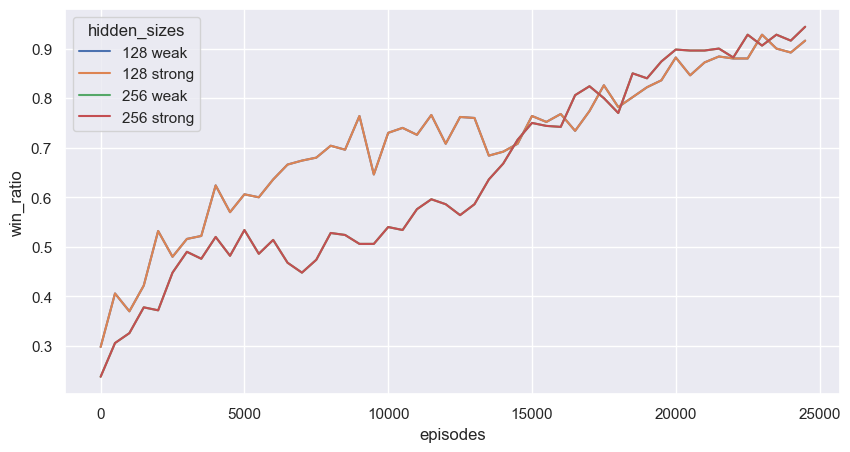

In [21]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})
 
ax = sns.lineplot(x='episodes', y='win_ratio', hue='hidden_sizes', data=winner_complete)
fig = ax.get_figure()
#fig.savefig('different_alphas_plot')

TAU

In [22]:
with open('stats/td3_checkpoint_hockey_defense_2x256_weak=False_e=25000_r=2.2187.pkl', 'rb') as f:
    stats_dict_tau005 = pickle.load(f)

with open('stats/td3_checkpoint_hockey_tau=0.01_defense_2x256_weak=False_e=25000_r=4.2002.pkl', 'rb') as f:
    stats_dict_tau01 = pickle.load(f)

with open('stats/td3_checkpoint_hockey_tau=0.0025_defense_2x256_weak=False_e=25000_r=6.3808.pkl', 'rb') as f:
    stats_dict_tau0025 = pickle.load(f)

#with open('stats/td3_checkpoint_hockey_tau=0.001_every2e_defense__weak=False_e=25000_r=2.5286.pkl', 'rb') as f:
#    stats_dict_tau001_every2e = pickle.load(f)

with open('stats/td3_checkpoint_hockey_tau=0.0001_defense_weak=False_e=25000_r=1.9763.pkl', 'rb') as f:
    stats_dict_tau0001 = pickle.load(f)

In [23]:
winners_tau005 = np.asarray(stats_dict_tau005['winners'])
winners_tau01 = np.asarray(stats_dict_tau01['winners'])
winners_tau0025 = np.asarray(stats_dict_tau0025['winners'])
winners_tau0001 = np.asarray(stats_dict_tau0001['winners'])
#winners_tau001_every2e = np.asarray(stats_dict_tau001_every2e['winners'])



In [24]:
win_ratio_tau005 = compute_win_ratio(winners_tau005)
win_ratio_tau01 = compute_win_ratio(winners_tau01)
win_ratio_tau0025 = compute_win_ratio(winners_tau0025)
win_ratio_tau0001 = compute_win_ratio(winners_tau0001)
#win_ratio_tau001_every2e = compute_win_ratio(winners_tau001_every2e)

In [25]:
# Tau
winner_tau = pd.DataFrame({'tau = 0.05': win_ratio_tau005, 'tau = 0.01': win_ratio_tau01, 'tau = 0.0025': win_ratio_tau0025, 'tau = 0.0001': win_ratio_tau0001})
winner_tau = winner_tau.reset_index()
winner_tau = winner_tau.rename(columns={'index': 'episodes'})
winner_tau['episodes'] = winner_tau['episodes'] * 500


In [26]:
winner_tau = winner_tau.melt(id_vars=['episodes'], var_name='tau', value_name='win_ratio')
winner_tau

,episodes,tau,win_ratio
0,0,tau = 0.05,0.238
1,500,tau = 0.05,0.306
2,1000,tau = 0.05,0.326
3,1500,tau = 0.05,0.378
4,2000,tau = 0.05,0.372
...,...,...,...
195,22500,tau = 0.0001,0.900
196,23000,tau = 0.0001,0.936
197,23500,tau = 0.0001,0.904
198,24000,tau = 0.0001,0.914


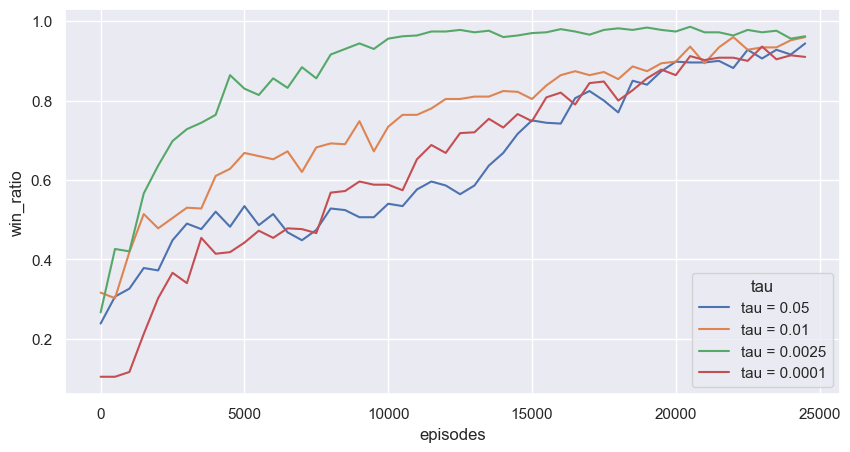

In [27]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})
 
ax = sns.lineplot(x='episodes', y='win_ratio', hue='tau', data=winner_tau)
fig = ax.get_figure()
fig.savefig('different_taus_plot')

Adapted Reward

In [57]:
with open('stats/td3_checkpoint_hockey_normal_0.8-1.2_weak=True_e=25000_r=3.4719.pkl', 'rb') as f:
    stats_dict_08_12 = pickle.load(f)

with open('stats/td3_checkpoint_hockey_normal_0.9-0.1_weak=True_e=25000_r=1.4983.pkl', 'rb') as f:
    stats_dict_09_01 = pickle.load(f)

with open('stats/td3_checkpoint_hockey_normal_0.9-1.1_weak=True_e=25000_r=5.4319.pkl', 'rb') as f:
    stats_dict_09_11 = pickle.load(f)

with open('stats/td3_checkpoint_hockey_2x256_defense_weak=False_e=25000_r=4.2314.pkl', 'rb') as f:
    stats_dict_normalR = pickle.load(f)


In [43]:
winners_08_12 = np.asarray(stats_dict_08_12['winners'])
winners_09_01 = np.asarray(stats_dict_09_01['winners'])
winners_09_11 = np.asarray(stats_dict_09_11['winners'])
winners_normalR = np.asarray(stats_dict_normalR['winners'])

win_ratio_08_12 = compute_win_ratio(winners_08_12)
win_ratio_09_01 = compute_win_ratio(winners_09_01)
win_ratio_09_11 = compute_win_ratio(winners_09_11)
win_ratio_normalR = compute_win_ratio(winners_normalR)


In [62]:
winner_reward = pd.DataFrame({'a = 0.8, b = 1.2': win_ratio_08_12, 'a = 0.9, b = 1.1': win_ratio_09_11, 'a = 0.9, b = 0.1': win_ratio_09_01,'normal reward': win_ratio_normalR})
winner_reward = winner_reward.reset_index()
winner_reward = winner_reward.rename(columns={'index': 'episodes'})
winner_reward['episodes'] = winner_reward['episodes'] * 500
winner_reward



,episodes,"a = 0.8, b = 1.2","a = 0.9, b = 1.1","a = 0.9, b = 0.1",normal reward
0,0,0.226,0.182,0.018,0.330
1,500,0.186,0.160,0.042,0.422
2,1000,0.174,0.248,0.032,0.416
3,1500,0.342,0.308,0.032,0.510
4,2000,0.310,0.376,0.066,0.480
5,2500,0.348,0.448,0.046,0.498
6,3000,0.428,0.480,0.076,0.490
7,3500,0.440,0.478,0.038,0.600
8,4000,0.416,0.510,0.078,0.546
9,4500,0.400,0.506,0.114,0.474


In [63]:
winner_reward = winner_reward.melt(id_vars=['episodes'], var_name='reward', value_name='win_ratio')
winner_reward

,episodes,reward,win_ratio
0,0,"a = 0.8, b = 1.2",0.226
1,500,"a = 0.8, b = 1.2",0.186
2,1000,"a = 0.8, b = 1.2",0.174
3,1500,"a = 0.8, b = 1.2",0.342
4,2000,"a = 0.8, b = 1.2",0.310
...,...,...,...
195,22500,normal reward,0.952
196,23000,normal reward,0.926
197,23500,normal reward,0.950
198,24000,normal reward,0.970


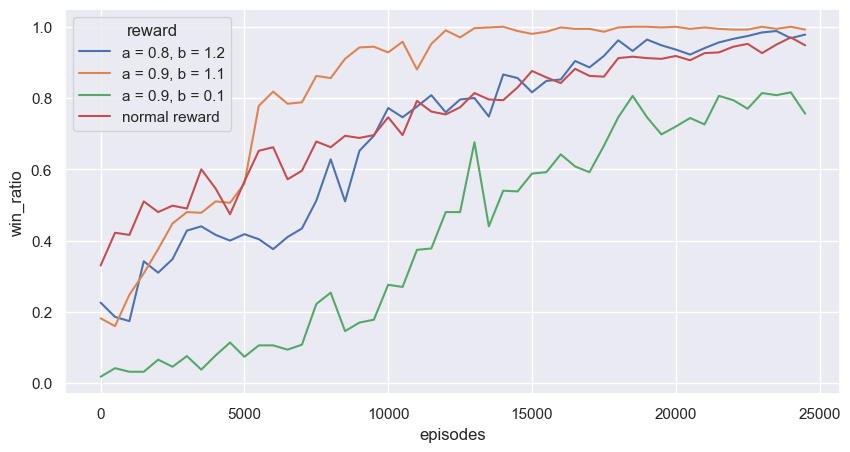

In [66]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})
 
ax = sns.lineplot(x='episodes', y='win_ratio', hue='reward', data=winner_reward)
fig = ax.get_figure()
fig.savefig('plots/reward')

 Normal 3x512 vs tau = 0.0025 & 3x512

In [33]:
with open('stats/td3_checkpoint_hockey_defense_3x512_weak=False_e=25000_r=5.0273.pkl', 'rb') as f:
    stats_dict_normal = pickle.load(f)

with open('stats/td3_checkpoint_hockey_3x512_tau=0.0025_normalR_defense__weak=False_e=25000_r=5.5927.pkl', 'rb') as f:
    stats_dict_512_tau = pickle.load(f)

with open('stats/td3_checkpoint_hockey_3x512_tau=0.005_every2e_normalR_defense__weak=False_e=25000_r=5.3623.pkl', 'rb') as f:
    stats_dict_512_tau2 = pickle.load(f)

with open('stats/td3_checkpoint_hockey_tau=0.0025_defense_2x256_weak=False_e=25000_r=6.3808.pkl', 'rb') as f:
    stats_dict_256_tau = pickle.load(f)

winners_normal = np.asarray(stats_dict_normal['winners'])
winners_512_tau = np.asarray(stats_dict_512_tau['winners'])
winners_512_tau2 = np.asarray(stats_dict_512_tau2['winners'])
winners_256_tau = np.asarray(stats_dict_256_tau['winners'])

win_ratio_normal = compute_win_ratio(winners_normal)
win_ratio_512_tau = compute_win_ratio(winners_512_tau)
win_ratio_512_tau2 = compute_win_ratio(winners_512_tau2)
win_ratio_256_tau = compute_win_ratio(winners_256_tau)

In [34]:

winner = pd.DataFrame({'3x512, tau=0.005, update every iteration': win_ratio_normal, '3x512, tau=0.0025, update every iteration': win_ratio_512_tau, '3x512, tau=0.005, update every 2nd iteration': win_ratio_512_tau2, '2x256, tau=0.0025, update every iteration': win_ratio_256_tau})
winner = winner.reset_index()
winner = winner.rename(columns={'index': 'episodes'})
winner['episodes'] = winner['episodes'] * 500

In [35]:
winner = winner.melt(id_vars=['episodes'], var_name='size&tau&update', value_name='win_ratio')

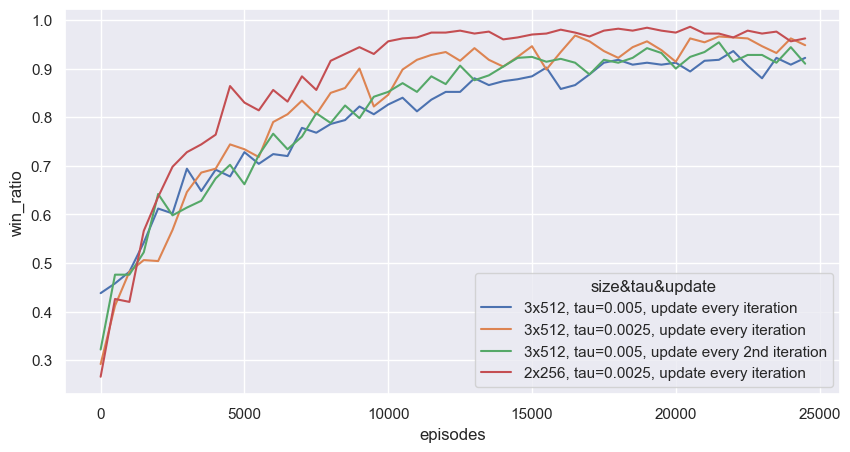

In [36]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})
 
ax = sns.lineplot(x='episodes', y='win_ratio', hue='size&tau&update', data=winner)
fig = ax.get_figure()
fig.savefig('tau_size_update')

Every vs every third update

In [37]:
with open('stats/td3_checkpoint_hockey_tau=0.0025_every3e_normal_2x256_weak=True_e=25000_r=8.9099.pkl', 'rb') as f:
    stats_dict_tau_256_every3 = pickle.load(f)

with open('stats/td3_checkpoint_hockey_tau=0.0025_every3e_normal_3x512_weak=True_e=25000_r=9.2063.pkl', 'rb') as f:
    stats_dict_tau_512_every3 = pickle.load(f)

with open('stats/td3_checkpoint_hockey_tau=0.0025_normal_2x256_weak=True_e=25000_r=8.8854.pkl', 'rb') as f:
    stats_dict_tau_256_every = pickle.load(f)

with open('stats/td3_checkpoint_hockey_tau=0.0025_normal_3x512_weak=True_e=25000_r=9.1997.pkl', 'rb') as f:
    stats_dict_tau_512_every = pickle.load(f)

winners_tau_256_every3 = np.asarray(stats_dict_tau_256_every3['winners'])
winners_tau_512_every3 = np.asarray(stats_dict_tau_512_every3['winners'])
winners_tau_256_every = np.asarray(stats_dict_tau_256_every['winners'])
winners_tau_512_every = np.asarray(stats_dict_tau_512_every['winners'])

win_ratio_tau_256_every3 = compute_win_ratio(winners_tau_256_every3)
win_ratio_tau_512_every3 = compute_win_ratio(winners_tau_512_every3)
win_ratio_tau_256_every = compute_win_ratio(winners_tau_256_every)
win_ratio_tau_512_every = compute_win_ratio(winners_tau_512_every)

In [38]:
winner_update = pd.DataFrame({'tau, 256, every3': win_ratio_tau_256_every3, 'tau, 512, every3': win_ratio_tau_512_every3, 'tau, 256, every': win_ratio_tau_256_every, 'tau, 512, every': win_ratio_tau_512_every})
winner_update = winner_update.reset_index()
winner_update = winner_update.rename(columns={'index': 'episodes'})
winner_update['episodes'] = winner_update['episodes'] * 500

In [39]:
winner_update = winner_update.melt(id_vars=['episodes'], var_name='tau&update', value_name='win_ratio')

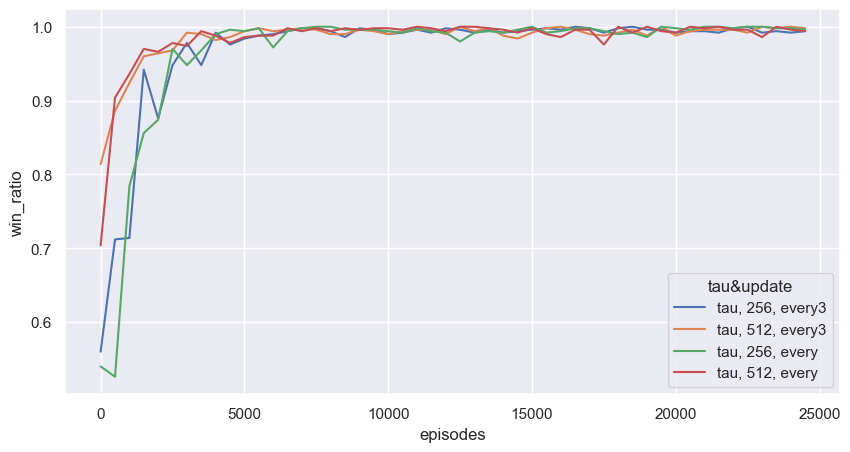

In [40]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10, 5)})
 
ax = sns.lineplot(x='episodes', y='win_ratio', hue='tau&update', data=winner_update)
fig = ax.get_figure()
fig.savefig('tau_and_update_freq')

Performance in different modes

ModuleNotFoundError: No module named 'SAC'